<a href="https://colab.research.google.com/github/sandipanpaul21/Tree-Based-Models-in-Python/blob/master/05_Decision_Trees_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Decision trees**
- Decision trees are *non-parametric supervised learning* algorithms used for both, *classification and regression tasks*
- The main idea of decision trees is to 
  1. find those *descriptive features which contain the most "information" regarding the target feature* 
  2. then *split the dataset* along the values of these features 
      1. such that the *target feature* values for the resulting sub_datasets are as *pure as possible*

- The goal is to create a model that *predicts the value of a target variable by learning simple decision rules* inferred from the data features. 

**NOTE** : Before giving data into Decision Tree Model, there should not be any missing values as Decision Tree cannot handle Missing Values in Independent Variables.

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
raw_data = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])
# Creating a copy of Raw Data, so that if we need to backtrack we will use raw_data
data = raw_data
features = data[["toothed","hair","breathes","legs"]]
target = data["species"]
print("Original Data")
print(data)

Original Data
  toothed   hair breathes   legs  species
0    True   True     True   True   Mammal
1    True   True     True   True   Mammal
2    True  False     True  False  Reptile
3   False   True     True   True   Mammal
4    True   True     True   True   Mammal
5    True   True     True   True   Mammal
6    True  False    False  False  Reptile
7    True  False     True  False  Reptile
8    True   True     True   True   Mammal
9   False  False     True   True  Reptile


In [ ]:
# Encoding
data.loc[data['toothed'] == 'True', 'toothed'] = 1
data.loc[data['toothed'] == 'False', 'toothed'] = 0
data.loc[data['hair'] == 'True', 'hair'] = 1
data.loc[data['hair'] == 'False', 'hair'] = 0
data.loc[data['breathes'] == 'True', 'breathes'] = 1
data.loc[data['breathes'] == 'False', 'breathes'] = 0
data.loc[data['legs'] == 'True', 'legs'] = 1
data.loc[data['legs'] == 'False', 'legs'] = 0
data.loc[data['species'] == 'Mammal', 'species'] = 1
data.loc[data['species'] == 'Reptile', 'species'] = 0

# Independent Variables
df1 = data.drop('species', axis =1)

# Dependent Varaibles
target = data['species']

print("After Encoding, Data is like")
print(data)

After Encoding, Data is like
  toothed hair breathes legs species
0       1    1        1    1       1
1       1    1        1    1       1
2       1    0        1    0       0
3       0    1        1    1       1
4       1    1        1    1       1
5       1    1        1    1       1
6       1    0        0    0       0
7       1    0        1    0       0
8       1    1        1    1       1
9       0    0        1    1       0


**How to differentiate the dataset which says whether it is "Mammals" or "Reptiles"?**

- The task for us is now to find the best "way" to split the dataset such that this can be achieved.
- What do I mean when I say split? 
  1. Well consider the dataset above and think about what must be done to split the dataset into 
    1. Dataset 1 containing as target feature values (species) only Mammals
    2. Dataset 2, containing only Reptiles.

**Answer** 
- To achieve that, in this simplified example, we only need the descriptive feature hair since if hair is TRUE, the associated species is always a Mammal.
- That is, we have split our dataset by asking the question if the animal has hair or not. 
- And exactly this asking and therewith splitting is the key to the decision tree models. 
- Now in that case the splitting has been very easy because we only have a small number of descriptive features and the dataset is completely separable along the values of only one descriptive feature. 
- Well, we have seen that using the hair descriptive feature seems to occupy the most information about the target feature since we only need this feature to perfectly split the dataset.
- So we will not consider Hair Variable as the tree will end after only one sub node (because it is same as Target Variable). Instead we can use after predicting the output to compare if prediction is same as Hair Variable

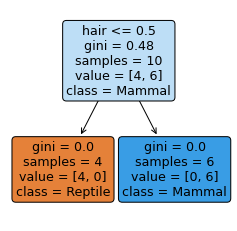

In [ ]:
# Target Variable should be in Int
target=target.astype('int')

# Random Forest Classifier
dtree=DecisionTreeClassifier()
dtree.fit(df1,target)

# Plotting the Tree
plt.figure(figsize = (4,4))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["Reptile", "Mammal"] , 
                     filled = True , precision = 4, rounded = True)

In [ ]:
print(data[['hair','species']])

# Inference
# They are identical columns so remove hair

  hair species
0    1       1
1    1       1
2    0       0
3    1       1
4    1       1
5    1       1
6    0       0
7    0       0
8    1       1
9    0       0


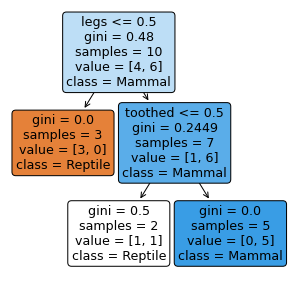

In [ ]:
# Remove Hair
df2 = df1.drop('hair', axis =1)

# Building Decision Tree after removing Hair
dtree=DecisionTreeClassifier()
dtree.fit(df2,target)

plt.figure(figsize = (5,5))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df2.columns, 
                     class_names =["Reptile", "Mammal"] , 
                     filled = True , precision = 4, rounded = True)

In [ ]:
data.drop('hair',axis=1) # Mammal- 1 and Reptile - 0

,toothed,breathes,legs,species
0,1,1,1,1
1,1,1,1,1
2,1,1,0,0
3,0,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,0,0,0
7,1,1,0,0
8,1,1,1,1
9,0,1,1,0


**The Maths Behind Decision Trees**
- Entropy of a dataset is used to measure the impurity of a dataset and we will use this kind of informativeness measure in our calculations. 
- There are also other types of measures which can be used to calculate the information gain. The most prominent ones are the: Gini Index, Chi-Square, Information gain ratio, Variance. 
- The term entropy : 
  - Imagine you have a lottery wheel which includes **100 green balls.**
  - The set of balls within the **lottery wheel can be said to be totally pure because only green balls are included. **
  - To express this in the terminology of **entropy, this set of balls has a entropy of 0 (we can also say zero impurity).**
  - Consider now, **30 of these balls are replaced by red and 20 by blue balls.**
  - If you now draw another ball from the lottery wheel, **the probability of receiving a green ball has dropped from 1.0 to 0.5 **
  - **Since the impurity increased, the purity decreased, hence also the entropy increased.**
  - Hence we can say, the **more "impure" a dataset, the higher the entropy and the less "impure" a dataset, the lower the entropy.**
  - Shannon's entropy model uses the logarithm function ($log_{2}(P(x))$) to measure the entropy and therewith the impurity of a dataset since the higher the probability of getting a specific result == P(x) (randomly drawing a green ball), the closer approaches the binary logarithm 1.

- Once a dataset contains more than one "type" of elements specifically more than one target feature value, the impurity will be greater than zero. Therefore the entropy of the dataset will be greater than zero. 
- Hence it is useful to sum up the entropies of each possible target feature value and weight it by the probability that we achieve these values assuming we would randomly draw values from the target feature value space 
- What is the probability to draw a green ball just by chance? Exactly, 0.5 and therewith we have to weight the entropy calculated for the green balls with 0.5. 
- This finally leads to the formal definition of Shannon's entropy which serves as the baseline for the information gain calculation:

Entropy = -P(x) * log(P(x)

where we say that P(x) is the probability. Hence applying this formula to our example with the three colored balls we get:

1. Green balls: H(x=green) = 0.5*log(0.5) = -0.5

2. Blue balls:  H(x=blue) = 0.2*log(0.2) = -0.464

3. Red balls: H(x=red) = 0.3*log(0.3) = -0.521

4. H(x): H(x) = -((-0.5)+(-0.464)+(-0.521)) = 1.485

- Lets apply this approach to our original dataset where we want to predict the animal species. 
- Our dataset has two target feature values in its target feature value space {Mammal, Reptile}. 
- Where P(x = Mammal) = 0.6 and P(x = Mammal) = 0.4. Hence the entropy of our dataset regarding the target feature is calculated with:

H(x) = -((0.6 * log(0.6))+(0.4 * log(0.4))) = 0.971



- We have now determined the total impurity/purity ( entropy) of our dataset which equals to approximately . 

**Now our task is to find the best feature in terms of information gain** (Remember that we want to find the feature which splits the data most accurate along the target feature values) which we should use to first split our data on (which serves as root node). 

Remember that the hair feature is no longer part of our feature set.

Dataset with the lowest impurity  entropy or in other words best classifies the target features by its own? 

1. Well, we use each descriptive feature and split the dataset along the values of these descriptive feature 
2. Calculate the entropy of the dataset once we have split the data along the feature values. 
3. This gives us the remaining entropy after we have split the dataset along the feature values. 
4. Next, we subtract this value from the originally calculated entropy of the dataset to see how much this feature splitting reduces the original entropy. 

The information gain of a feature is calculated with:

InfoGain(feature_{d}) = Entropy(D) - Entropy(feature_{d})


So the only thing we have to do is to split the dataset along the values of each feature and then treat these sub sets as if they were our "original" dataset in terms of entropy calculation. 

In [ ]:
raw_data

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


Calculate Information Theory for Column "Toothed"

Entopy = -p * (log (p))
1. Toothed = 10
2. Toothed_True = 8
3. Toothed_False = 2
4. Toothed_True_Mammal = 5
5. Toothed_True_Reptile = 3
6. Toothed_False_Mammal = 1
7. Toothed_False_Reptile = 1

Information Gain Steps - 
1. Calculate entropy for Toothed = True
2. Calculate entropy for Toothed = False
3. Sum up the entropies
4. Subtract the Sum from whole dataset entropy = Infogain

Entropy(Toothed_True) = 8/10 - (Toothed_True_Mammal + Toothed_True_Reptile )
= 8/10 - (5/8 * log(5/8) + 3/8 * log(3/8)) 

Entropy(Toothed_False) = 2/10 - (Toothed_False_Mammal + Toothed_False_Reptile)
= 2/10 - (1/2 * log(1/2) + 1/2 * log(1/2))

Entropy(Toothed_True) + Entropy(Toothed_False) = 0.963547

p(Mammal) = 0.6, p(Reptile) = 0.4,
Overall Entropy = - ((0.6) * log(0.6)) + (0.4) * log(0.4)) = 0.971

Information Gain(Toothed) = 0.971 - 0.963 = 0.00745

Information Gain(Toothed) = 0.00745

Same for, 

Information Gain(Breath) = 0.144 

Information Gain(Legs) = 0.556

Hence the splitting the dataset along the feature legs results in the largest information gain and we should use this feature for our root node.







- We see that for legs == False, the target feature values of the remaining dataset are all Reptile and hence we set this as leaf node because we have a pure dataset

- Until now we have found the feature for the root node as well as a leaf node for legs == False. The same steps for information gain calculation must now be accomplished also for the remaining dataset for legs == True since here we still have a mixture of different target feature values. Hence we will do the same information gain for remaining variable (Toothed and Breath)

In [ ]:
raw_data.loc[data['legs'] == 'False']

,toothed,hair,breathes,legs,species
2,True,False,True,False,Reptile
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile


In [ ]:
raw_data.loc[data['legs'] == 'True']

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


Information gain calculation for the features toothed and breathes for the remaining dataset legs == True:

Entropy of the (new) sub data set after first split:

H(D) = -((6/7 * log(6/7)) + (1/7 log(1/7))) = 0.5917

**Toothed** 

H(Toothed) = 5/7 * -(1 * log(1) + 0) + 2/7 * -((1/2 * log(1/2)) + (1/2 * log(1/2))) = 0.285

InfoGain(Toothed) = 0.5917 - 0.285 = 0.3067

**Breathes**

7/7 * -((6/7 * log(6/7)) + (1/7 * log(1/7))) + 0 = 0.5917

InfoGain(toothed) = 0.5917 - 0.5917 = 0

The dataset for toothed == False still contains a mixture of different target feature values why we proceed partitioning on the last left feature (== breathes)



In [ ]:
raw_data.loc[data['toothed'] == 'False']

,toothed,hair,breathes,legs,species
3,False,True,True,True,Mammal
9,False,False,True,True,Reptile


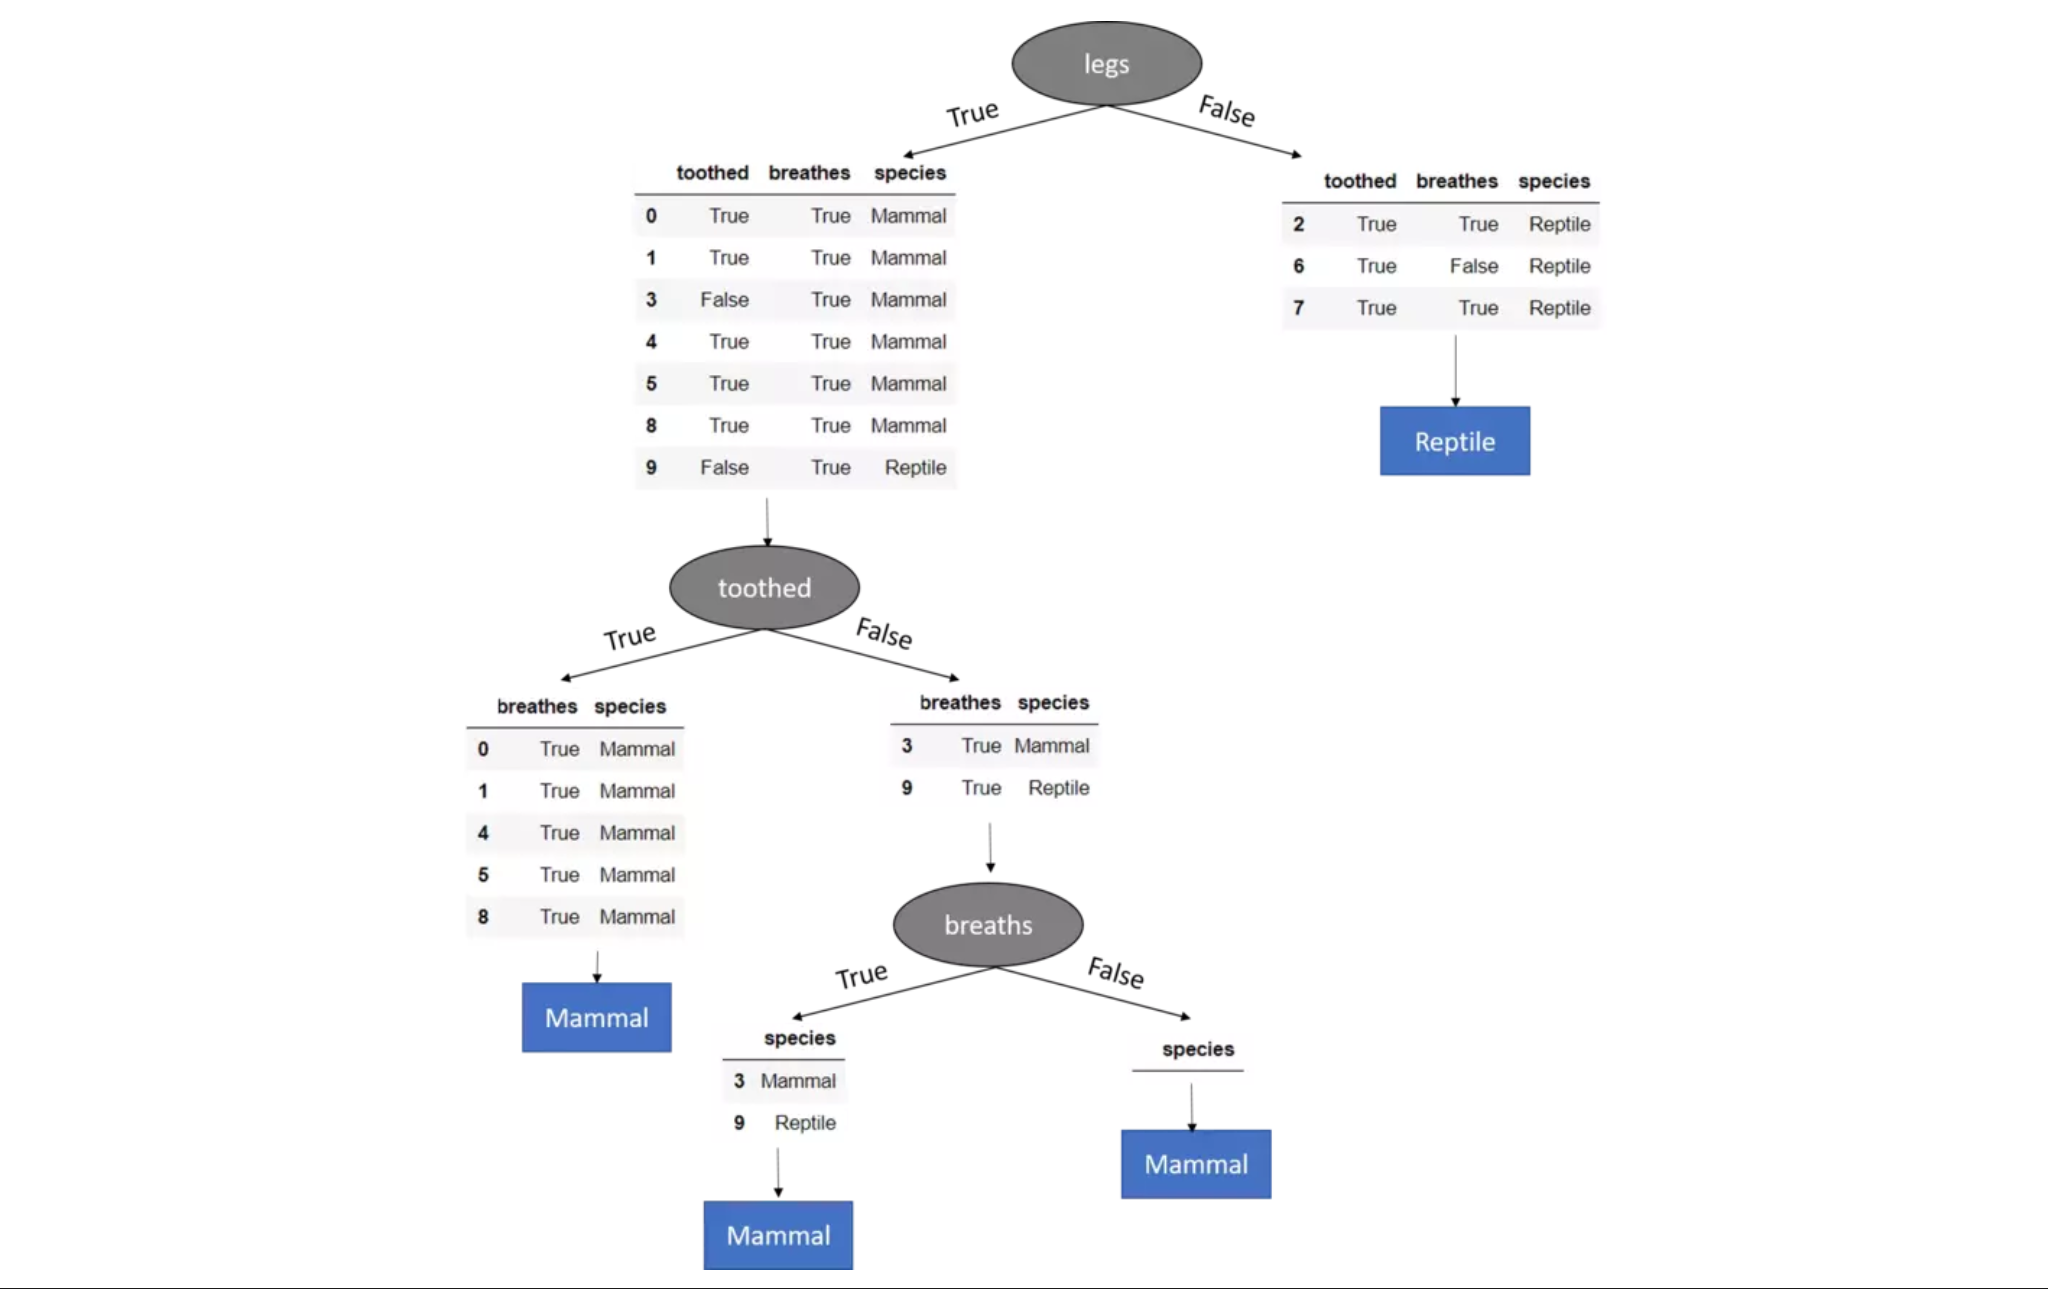

In [7]:
from IPython.display import Image
Image('/content/drive/MyDrive/Demo Images/File_000.png')

**Advantage of Decision Tree**
1. Decision trees are easy to interpret and visualize.
2. It can easily capture Non-linear patterns.
3. It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
4. It can be used for feature engineering such as predicting missing values, suitable for variable selection.
5. The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

**Disadvantage of Decision Tree**
1. Sensitive to noisy data. It can overfit noisy data.
2. The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
3. Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

**Measuring the Impurity of Nodes Created Via Decision Tree Analysis**

- Gini referred to as Gini ratio measures the impurity of the node in a decision tree. One can assume that a node is pure when all of its records belong to the same class. Such nodes are known as the leaf nodes.

- In our outcome above, the complete decision tree is difficult to interpret due to the complexity of the outcome. Pruning/shortening a tree is essential to ease our understanding of the outcome and optimise it. 

**Optimization or Setting Constraints on Tree Size**

  1. **criterion: optional (default=”gini”) or Choose attribute selection measure.** 
    - This parameter allows us to use the attribute selection measure. 
  2. **splitter: string, optional (default=”best”) or Split Strategy**
    - Allows the user to split strategy. You may choose “best” to choose the best split or “random” to choose the best random split.
  3. **max_depth: int or None, optional (default=None) or Maximum Depth of a Tree**
    - This parameter determines the maximum depth of the tree. A higher value of this variable causes overfitting and a lower value causes underfitting.
  4. **Maximum features to consider for a split**
    - The number of features to consider while searching for the best split. These will be randomly selected.
    - As a thumb-rule, the square root of the total number of features works great but we should check up to 30–40% of the total number of features.
    - Higher values can lead to over-fitting but depend on case to case.
  5. **Minimum samples for a node split**
    - Defines the minimum number of observations that are required in a node to be considered for splitting. (this ensures above mentioned worst-case scenario).
    - A higher value of this parameter prevents a model from learning relations that might be highly specific to the particular sample selected for a tree.
    - Too high values can lead to under-fitting hence, it should be tuned properly using cross-validation.

**Stopping criterion**
We can come up with a large number of stopping criteria, for example:
1. Limit the maximum depth of a Tree;
2. Limit the minimum number of samples in a leaf;
3. Limit the maximum number of leaves in a Tree;
4. Stop building a Tree if all samples in a leaf belong to the same class
And others.

The stopping criterion must be chosen wisely as it can significantly affect the overall quality of a Tree. However, such a selection will be time expensive as it will require cross-validation.

In [ ]:
# Another Example

# CLASSIFICATION
# IRIS Dataset
df = sns.load_dataset('iris')
df.head()

# Inference 
# We have 4 feature columns sepal_length, sepal_width, petal_length, and petal_width respectively with one target column species.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Getting information of dataset

df.info()
print("Rows and Columns",df.shape)

# Inference
# we understand that this dataset has 
# 150 records, 
# 5 columns with the first four of type float and last of type object str 
# there are no NAN values as form following command

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Rows and Columns (150, 5)


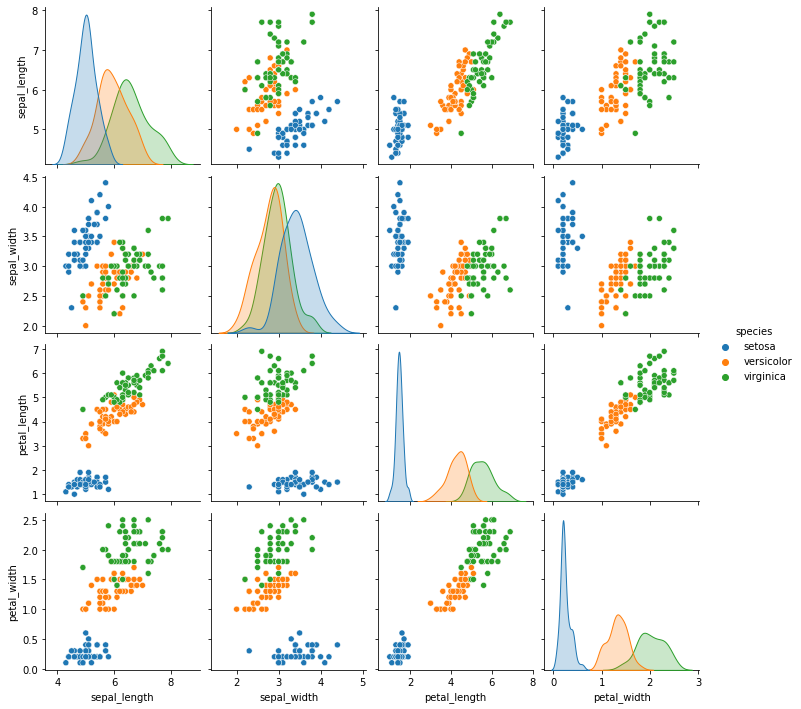

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'species')

# Inference 
# We have a total of 3 species that we want to predict: setosa, versicolor, and virginica. 
# We can see that setosa always forms a different cluster from the other two.

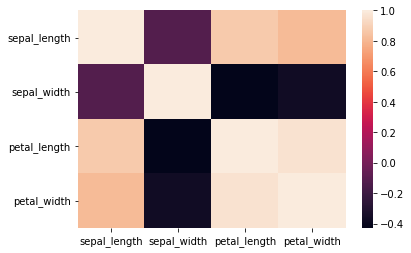

In [ ]:
# correlation matrix
sns.heatmap(df.corr())

# Inference : 
# We can observe from the above two plots:
# Setosa always forms a different cluster.
# Petal length is highly related to petal width.
# Sepal length is not related to sepal width.

In [ ]:
# Data Preprocessing
# Now, we will separate the target variable(y) and features(X) as follows

target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis =1)
# It is good practice not to drop or add a new column to the original dataset. 
# Make a copy of it and then modify it so in case things don’t work out as we expected, 
# we have the original data to start again with a different approach.

# Just for the sake of following mostly used convention, we are storing df in X

# Defining the attributes
X = df1
# Now let’s look at our target variable

print("Target Variable :")
print(target.head())

Target Variable :
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [ ]:
# target has categorical variables stored in it we will encode it in numeric values for working.

# label encoding
le = LabelEncoder()
target = le.fit_transform(target)

# We get its encoding as above, setosa:0, versicolor:1, virginica:2
# Again for the sake of following the standard naming convention, naming target as y

y = target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Splitting the dataset into training and testing sets. selecting 20% records randomly for testing

# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


In [ ]:
# Modeling Tree and testing it

# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# In the above code, we created an object of the class DecisionTreeClassifier , 
# store its address in the variable dtree, so we can access the object using dtree. 
# Then we fit this tree with our X_train and y_train . 
# Finally, we print the statement Decision Tree Classifier Created after the decision tree is built.

DecisionTreeClassifier()

In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

# Inference
# We got an accuracy of 100% on the testing dataset of 30 records.

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

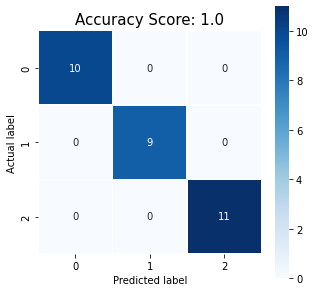

In [ ]:
# let’s plot the confusion matrix as follows

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

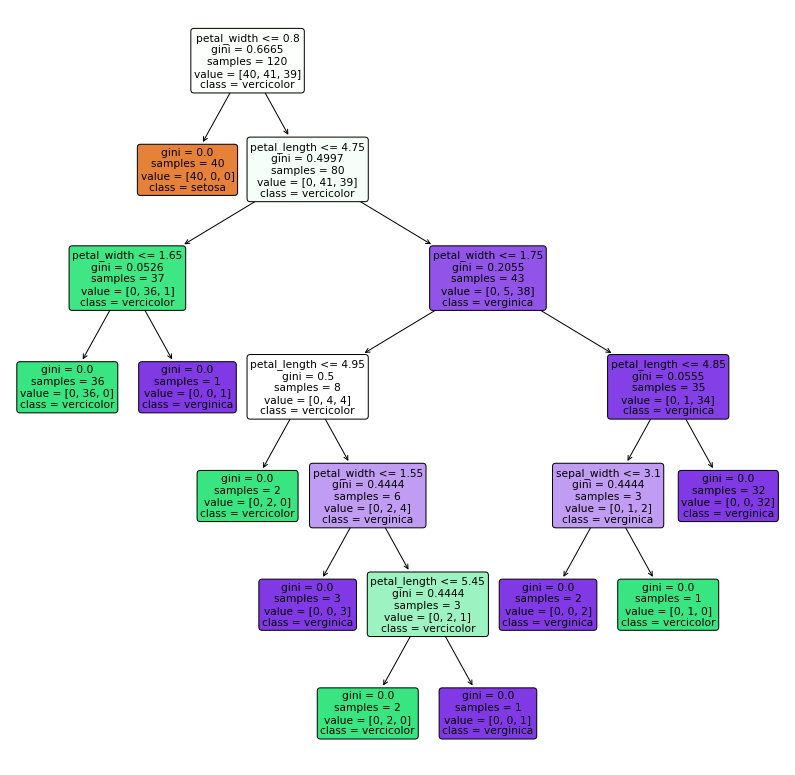

In [ ]:
# Visualizing the decision tree
# We can directly plot the tree that we build using the following commands

# Visualising the graph without the use of graphviz
plt.figure(figsize = (14,14))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , 
                     filled = True , precision = 4, rounded = True)